##Task 3

#Customer Segmentation / Clustering

#Data Preprocessing and Feature Engineering

In [ ]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

data = pd.merge(transactions, customers, on="CustomerID", how="inner")


In [ ]:
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['SignupDuration'] = (pd.to_datetime('today') - data['SignupDate']).dt.days

customer_features = data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    unique_products=('ProductID', 'nunique'),
    total_transactions=('TransactionID', 'nunique'),
    signup_duration=('SignupDuration', 'mean')
).reset_index()


#Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns='CustomerID'))


#Apply Clustering Algorithm

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)


#Evaluate Clustering Results

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"DB Index: {db_index}")


DB Index: 1.0728768231949348


#Visualize the Clusters

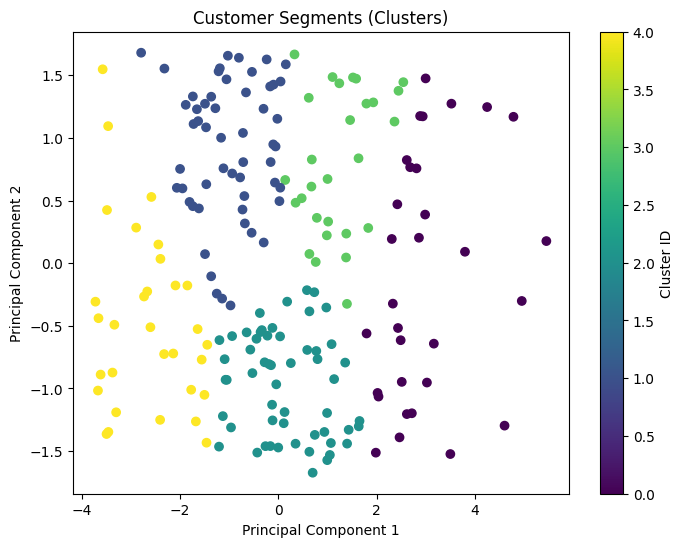

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=customer_features['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title('Customer Segments (Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#Interpret the Results

In [ ]:
print(customer_features.columns)

Index(['CustomerID', 'total_spent', 'total_quantity', 'unique_products',
       'total_transactions', 'signup_duration', 'Cluster'],
      dtype='object')


In [ ]:
scaled_features = scaler.fit_transform(customer_features[['total_quantity', 'total_spent', 'total_transactions']])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaled_features = scaler.fit_transform(customer_features[['total_quantity', 'total_spent', 'total_transactions']])

kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

print(customer_features.head())


  CustomerID  total_spent  total_quantity  unique_products  \
0      C0001      3354.52              12                5   
1      C0002      1862.74              10                4   
2      C0003      2725.38              14                4   
3      C0004      5354.88              23                8   
4      C0005      2034.24               7                3   

   total_transactions  signup_duration  Cluster  
0                   5            932.0        4  
1                   4           1079.0        4  
2                   4            326.0        4  
3                   8            841.0        3  
4                   3            896.0        1  
